In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')

%load_ext autoreload
%autoreload 2

# Завдання
## 1. Побудувати графік емпіричної функції розподілу ймовірностей для даних наведених у таблиці:
|$X$|$1$ |$3$ |$5$ |$7$ |$9$ |
|---|--- |--- |--- |--- |--- |
|$N$|$10$|$15$|$30$|$33$|$12$|

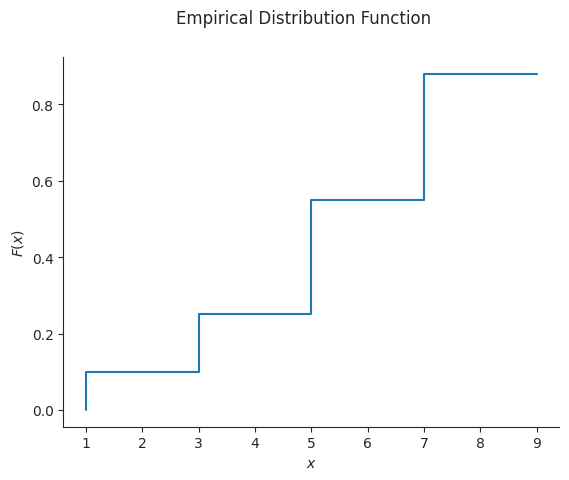

In [2]:
x = np.array([1, 3, 5, 7, 9])
n = np.array([10, 15, 30, 33, 12])
# calculate relative frequencies
w = n / n.sum()
# calculate empirical distribution function
f = [0, *w.cumsum()[:-1]]

plt.suptitle('Empirical Distribution Function')
plt.step(x, f)
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
sns.despine()
plt.show()

## 2. Побудувати гістограми та полігони за даними, які треба отримати в результаті генерування випадкових чисел (отримати вибірки для нормального, рівномірного та експоненціального розподілів). Для кожного з розподілів сформувати вибірки при $N=20$; $N=200$; $N=200000$
Мій номер бригади $N_{\text{бр}}=1$

In [3]:
def make_plots(a, title):
    # calculate histogram
    counts, bins = np.histogram(a, 'auto')
    # calculate centers of the bars
    centers = (bins[:-1] + bins[1:]) / 2

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi=300)
    fig.suptitle(title, fontsize=14)

    # plot histogram
    ax1.bar(centers, counts, width=bins[1:] - bins[:-1])
    # plot frequency polygon
    ax2.plot(centers, counts)

    ax1.set_title('Histogram', fontsize=12)
    ax2.set_title('Frequency Polygon', fontsize=12)

    ax1.set_xlabel('x', fontsize=10)
    ax1.set_ylabel('N', fontsize=10)
    ax2.set_xlabel('x', fontsize=10)
    ax2.set_ylabel('N', fontsize=10)

    sns.despine()
    plt.show()

### 2.1 Нормальний розподіл
$$\mu=10N_{\text{бр}};\; \sigma=N_{\text{бр}}$$

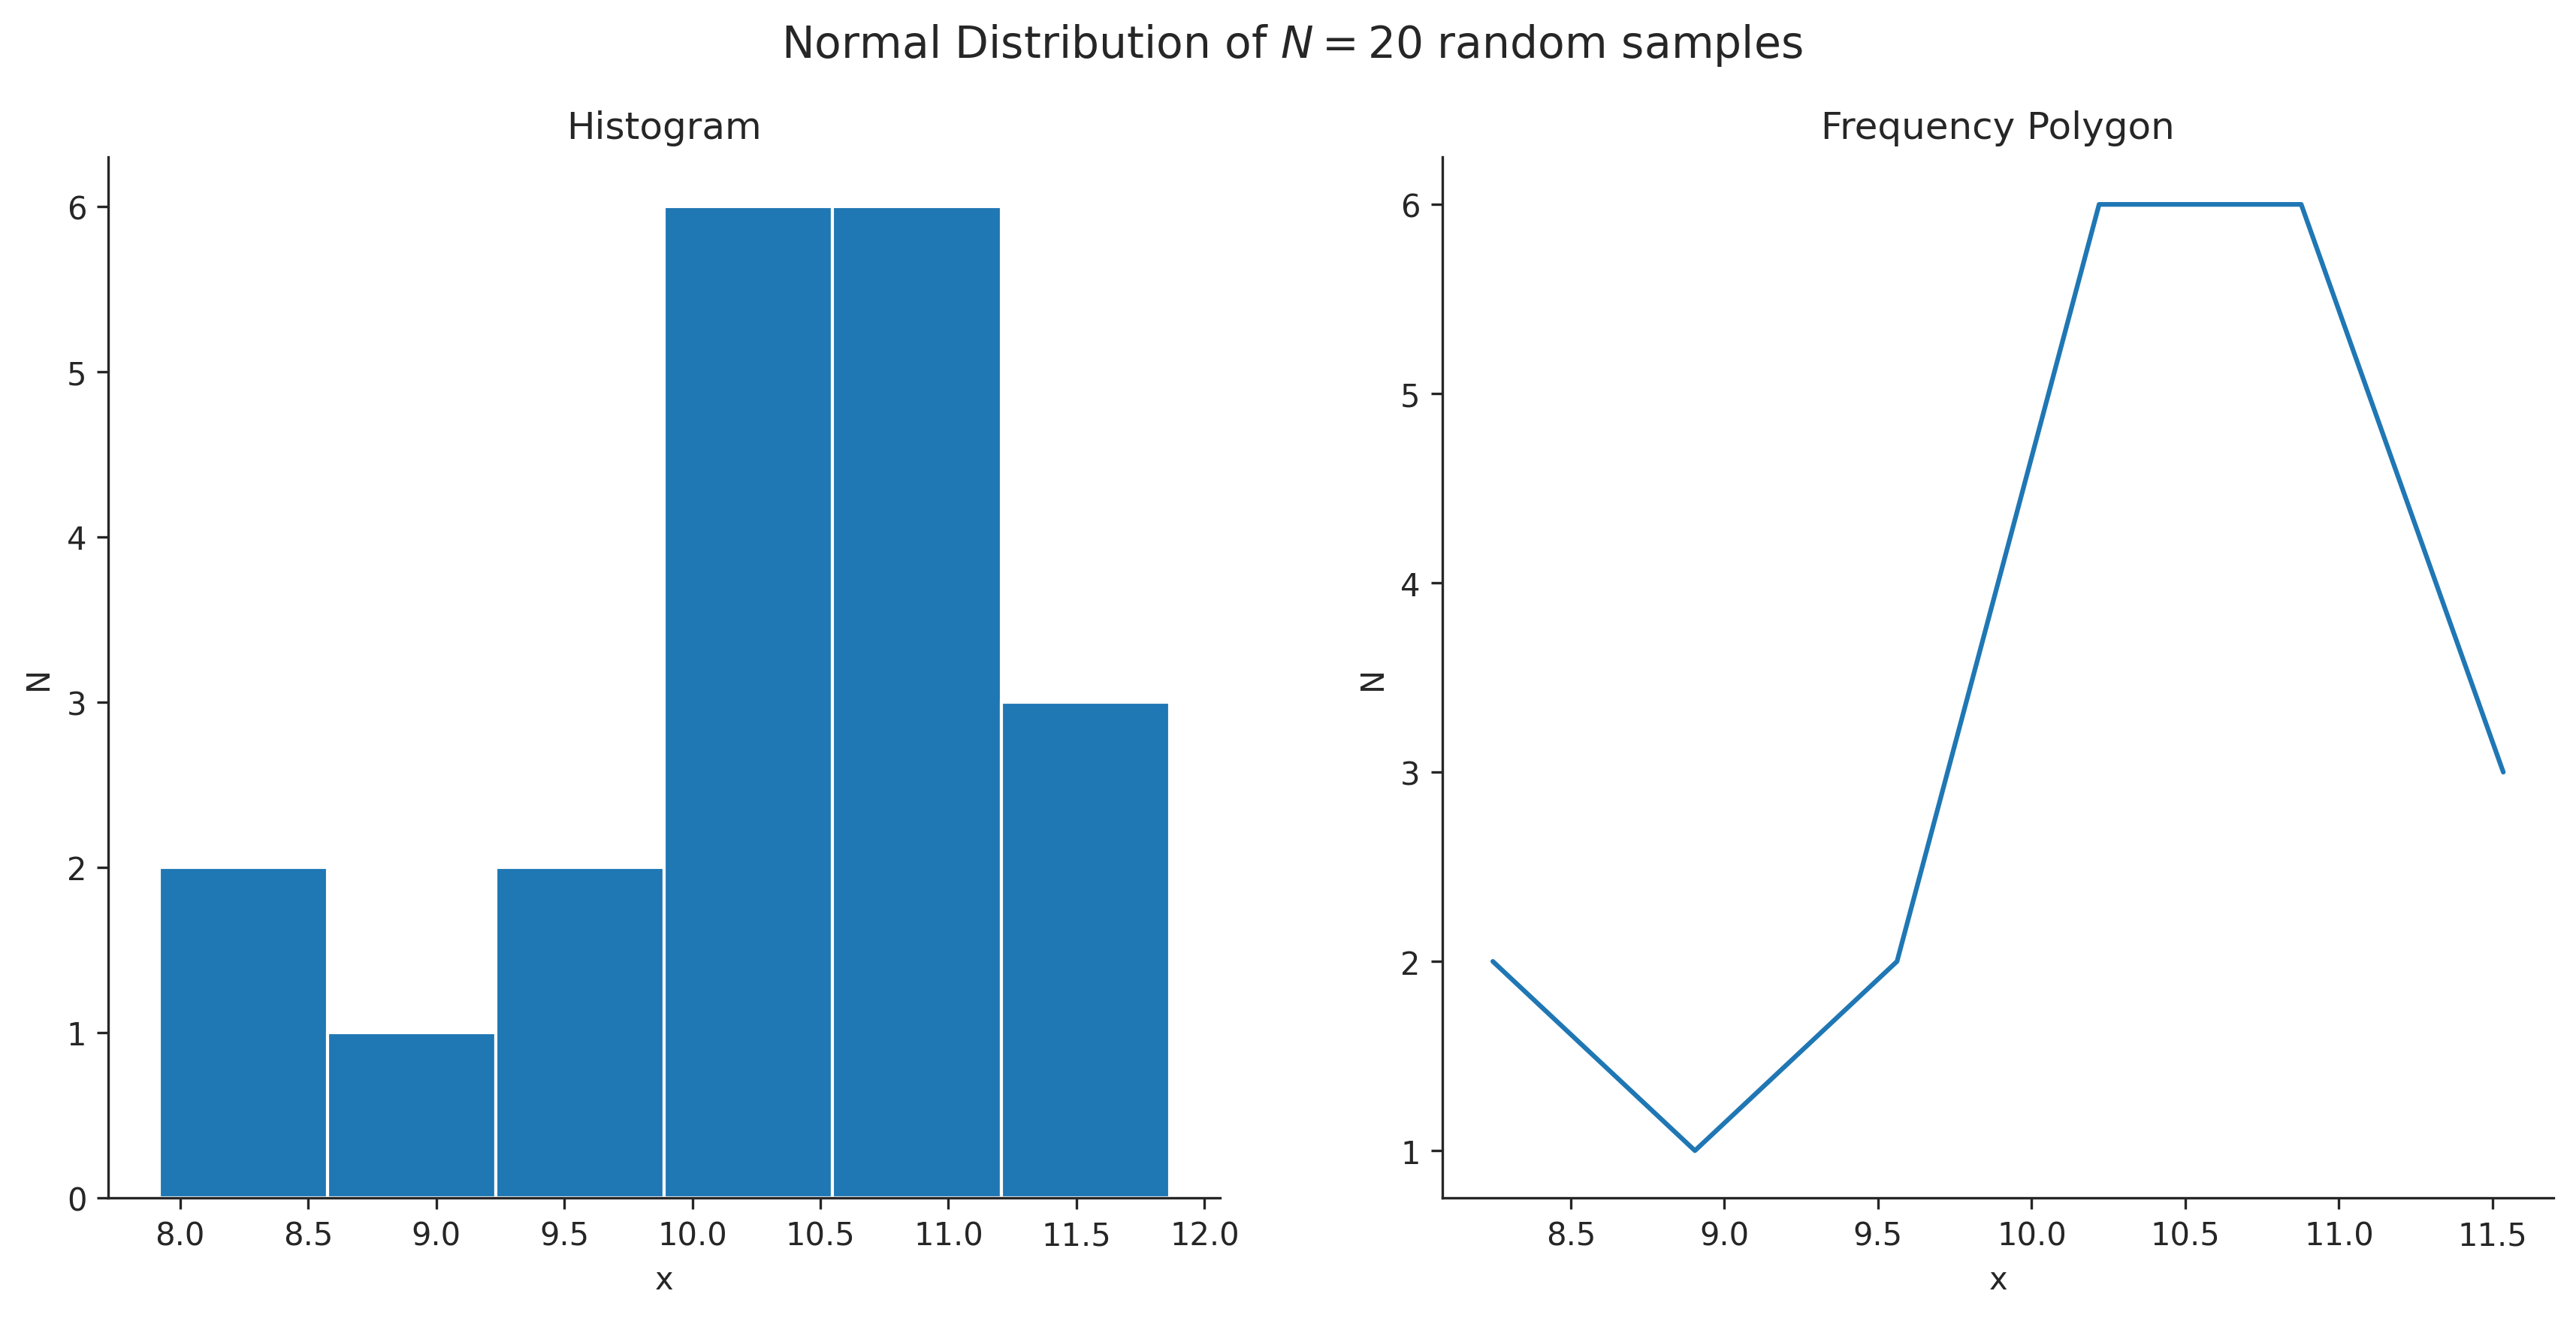

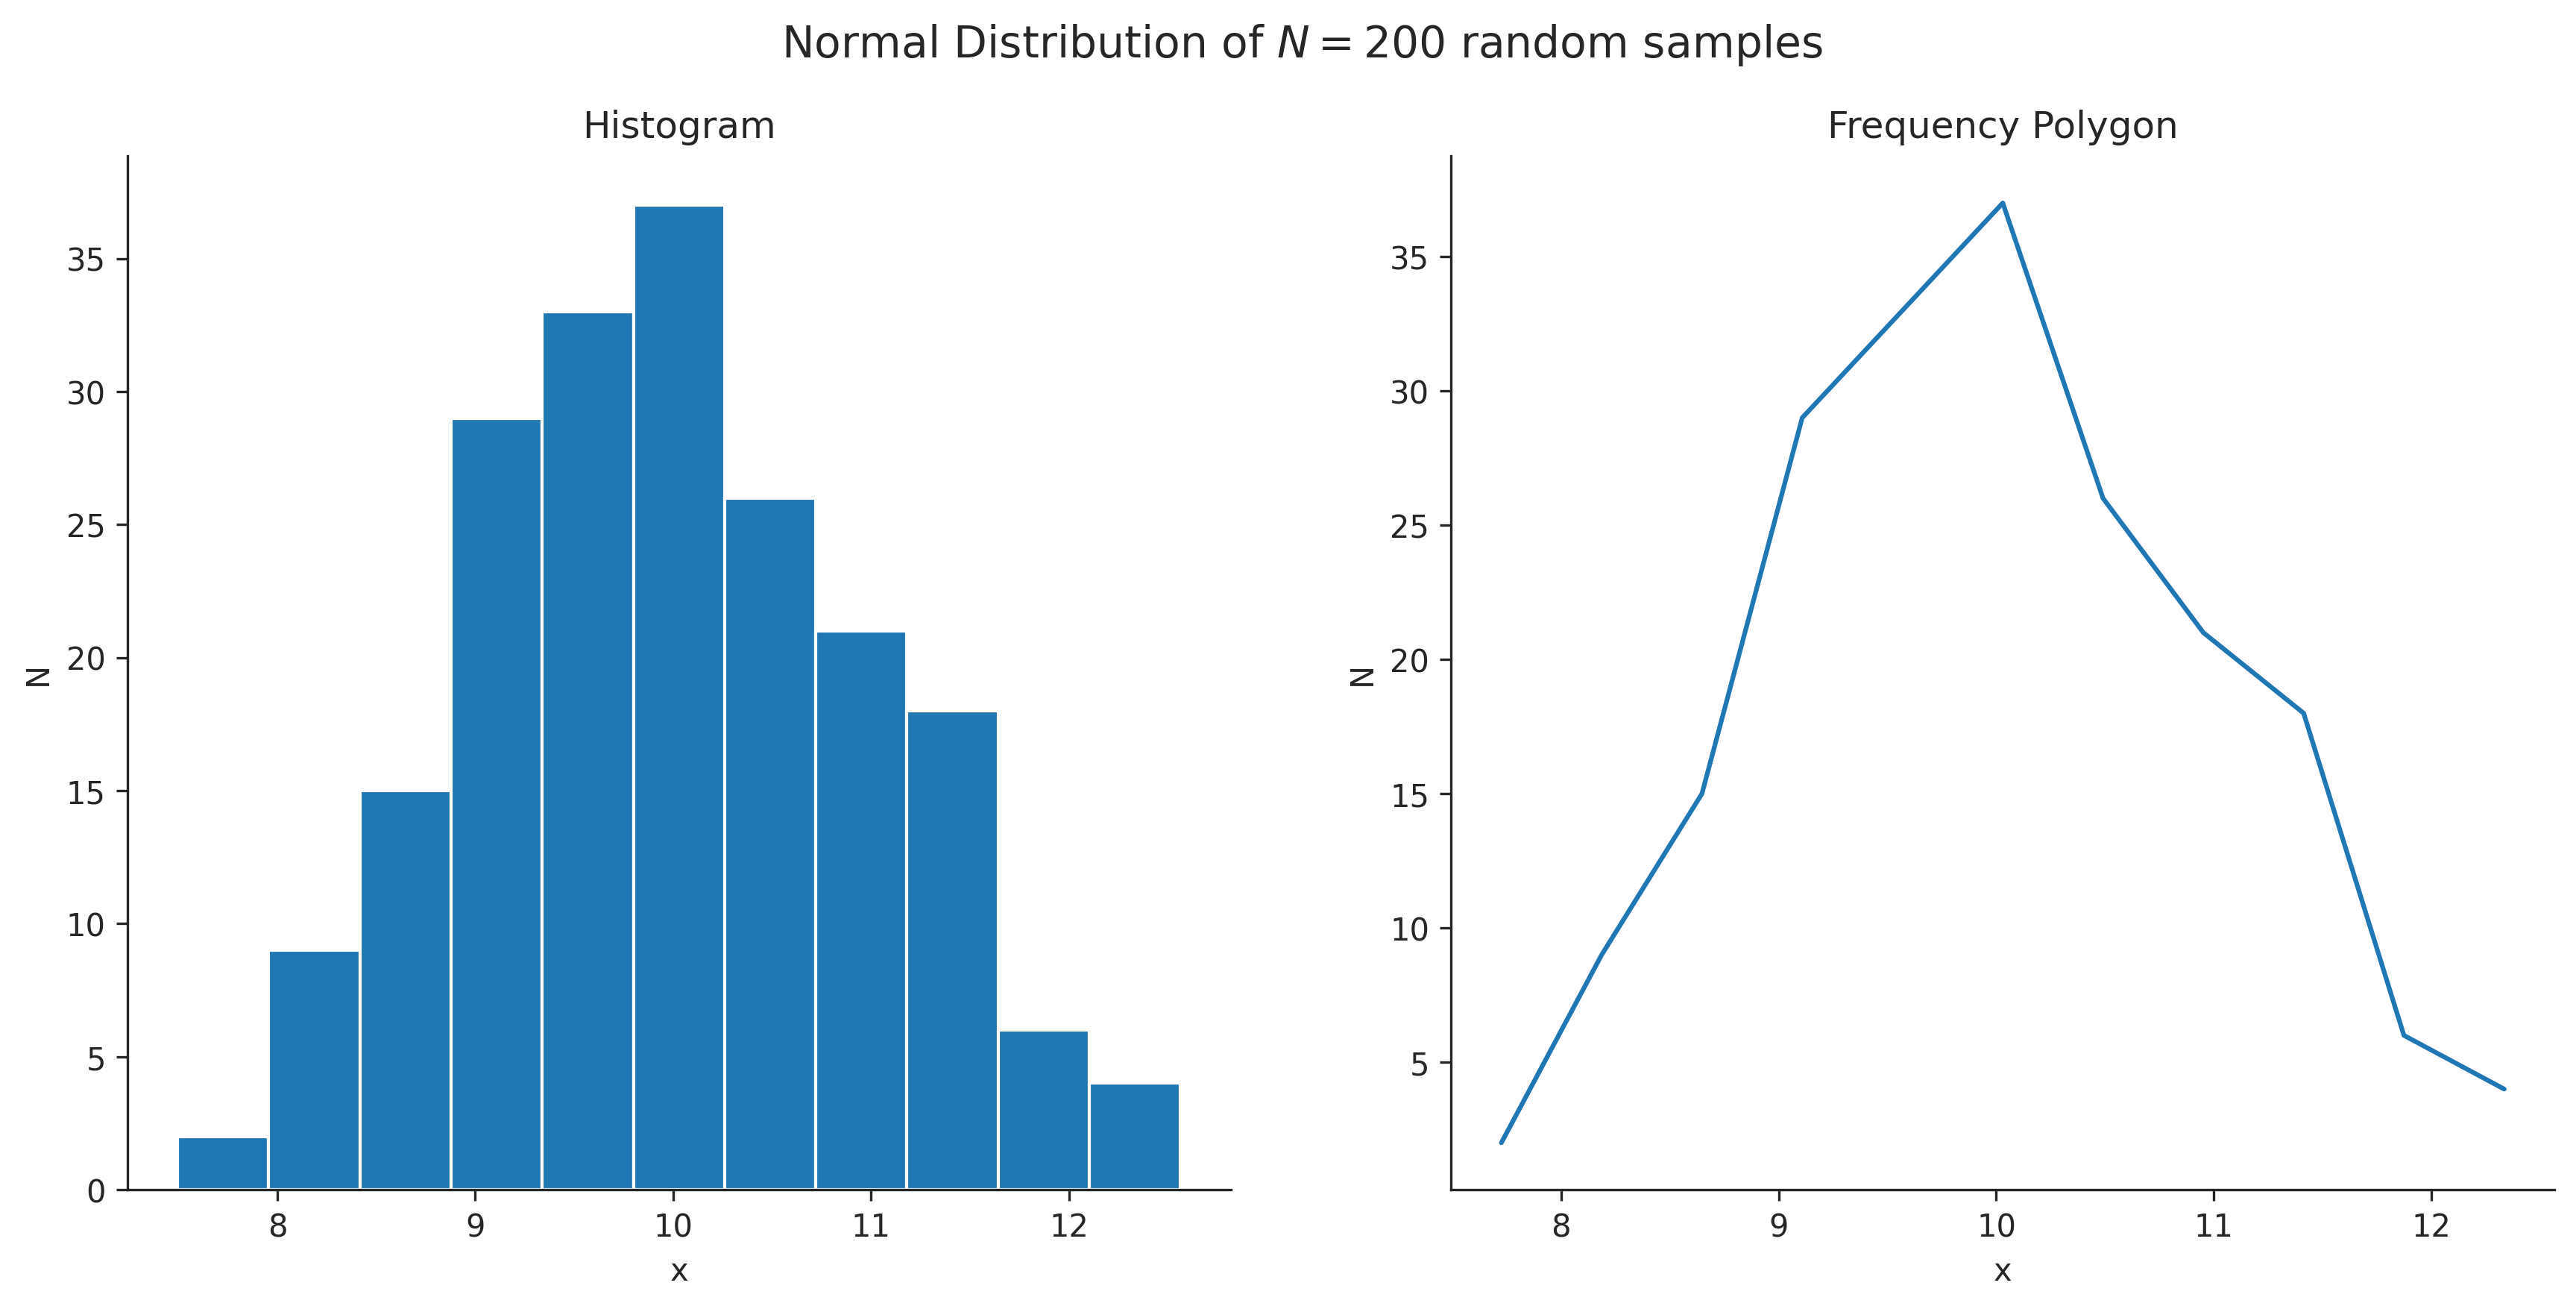

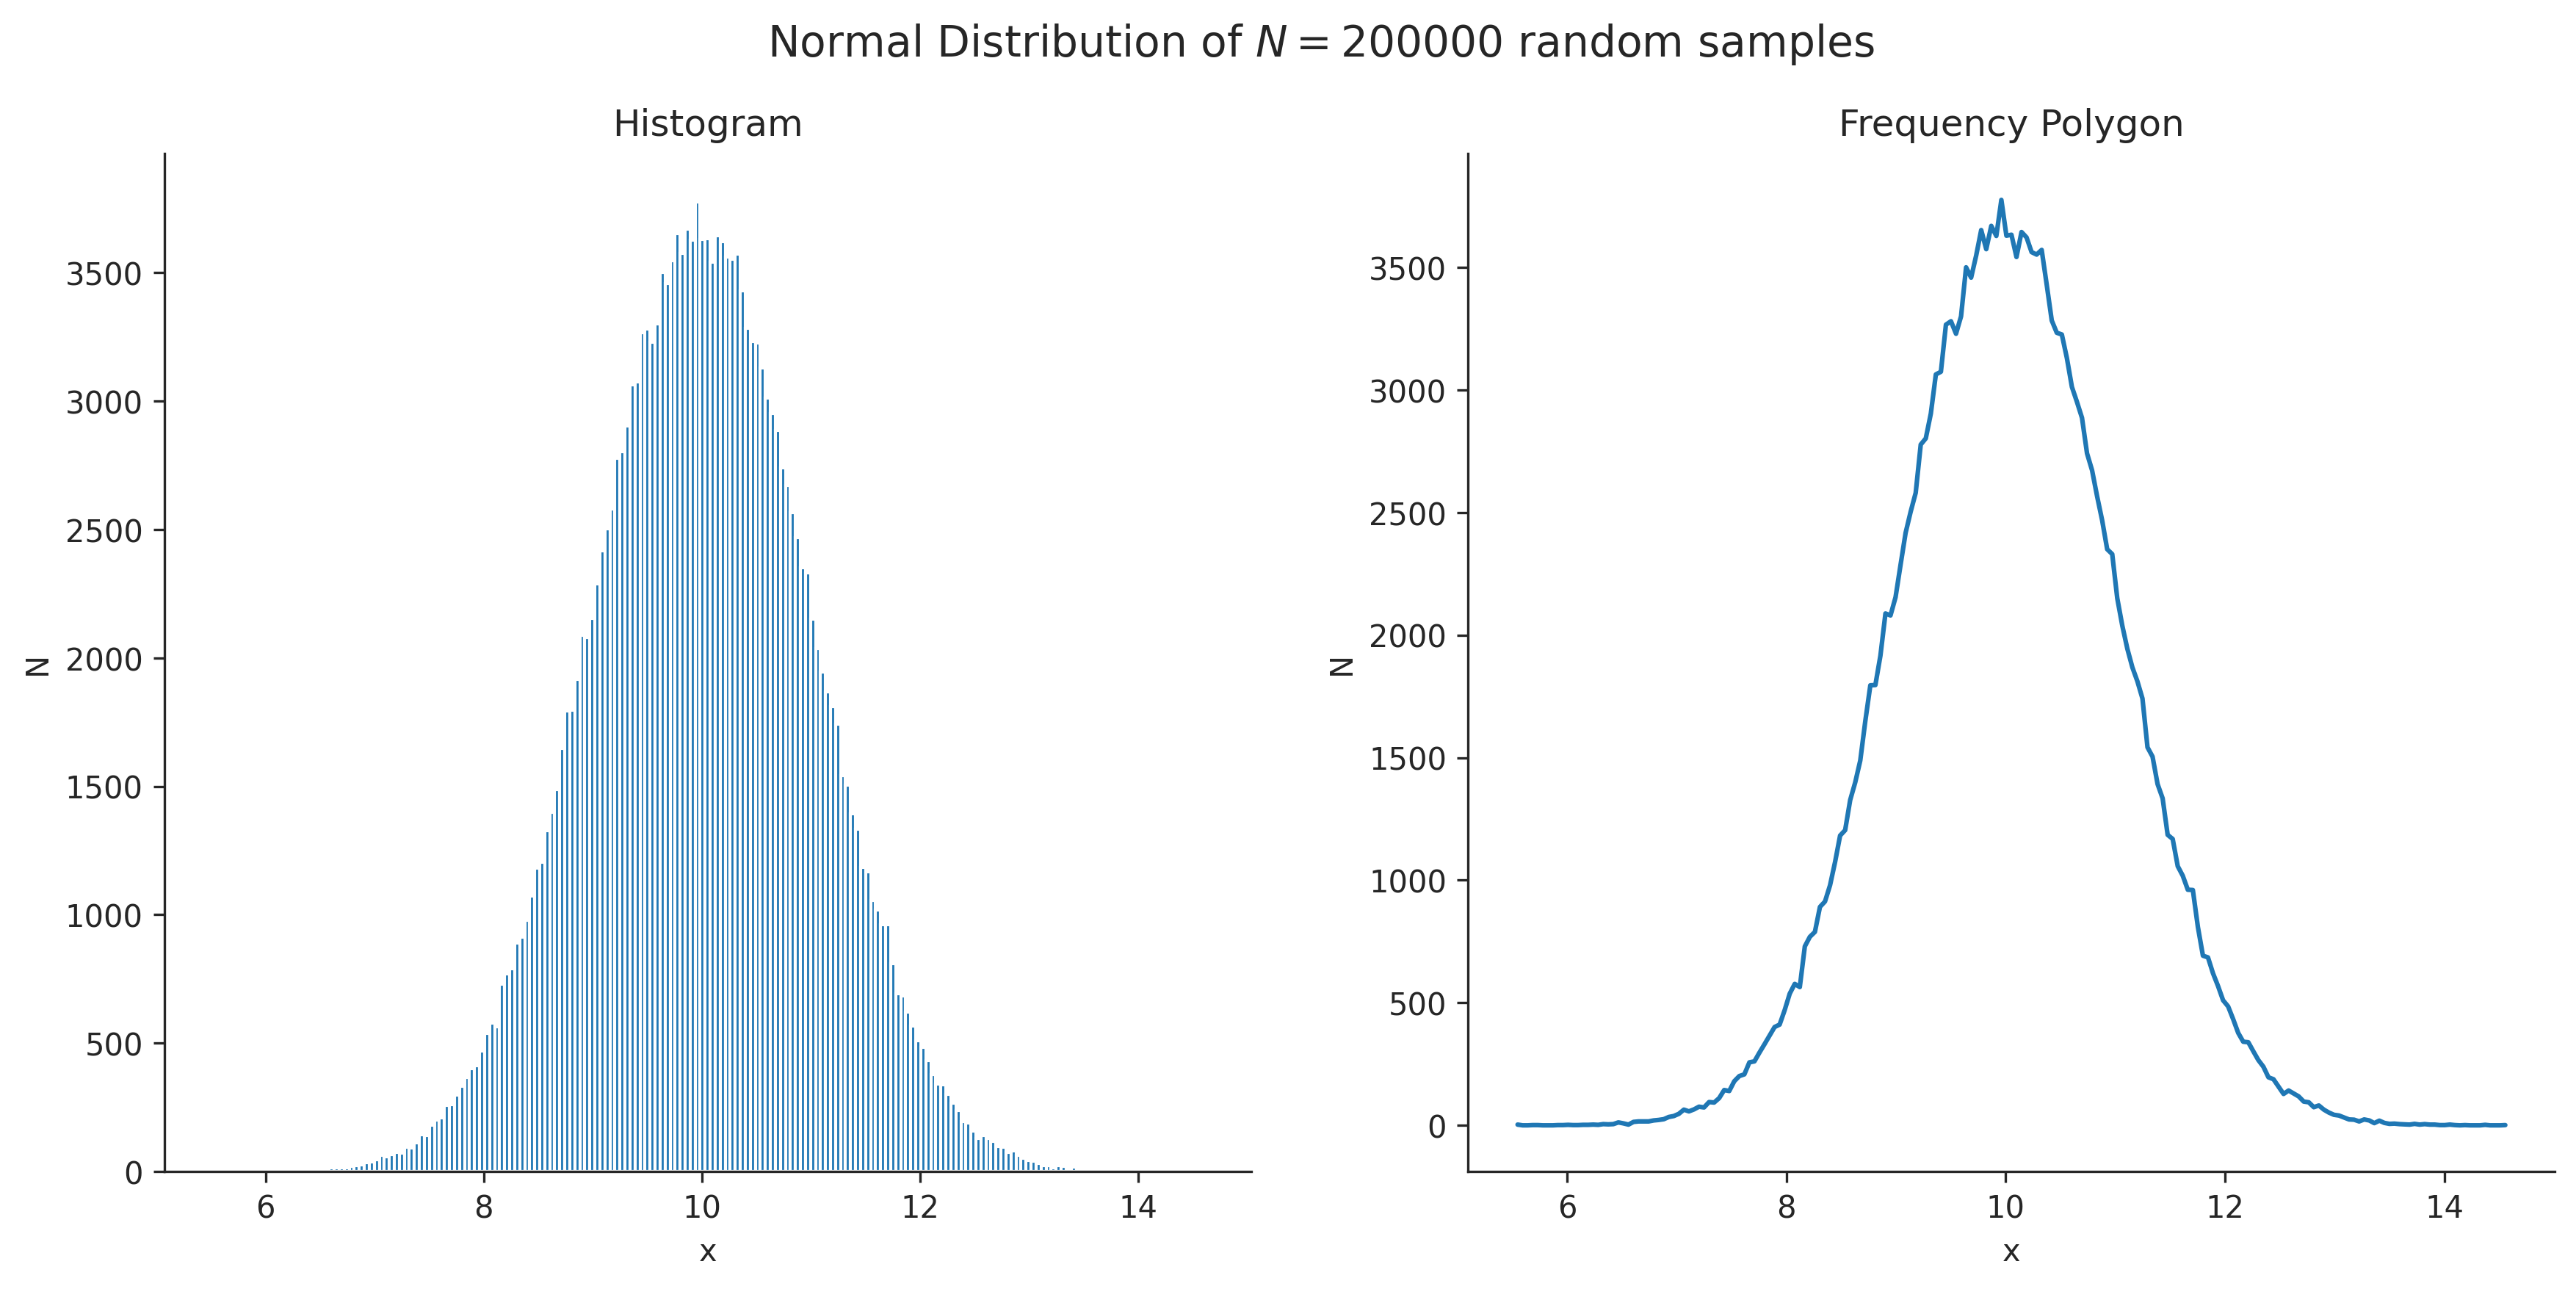

In [4]:
n_group = 1
mean = 10 * n_group
std = n_group
for n in (20, 200, 200000):
    # gererate n data points
    x = np.random.normal(mean, std, n)
    # create plots
    make_plots(x, f'Normal Distribution of $N={n}$ random samples')

## 2.2 Рівномірний розподіл
$$a=-N_{\text{бр}};\;b=5N_{\text{бр}}$$

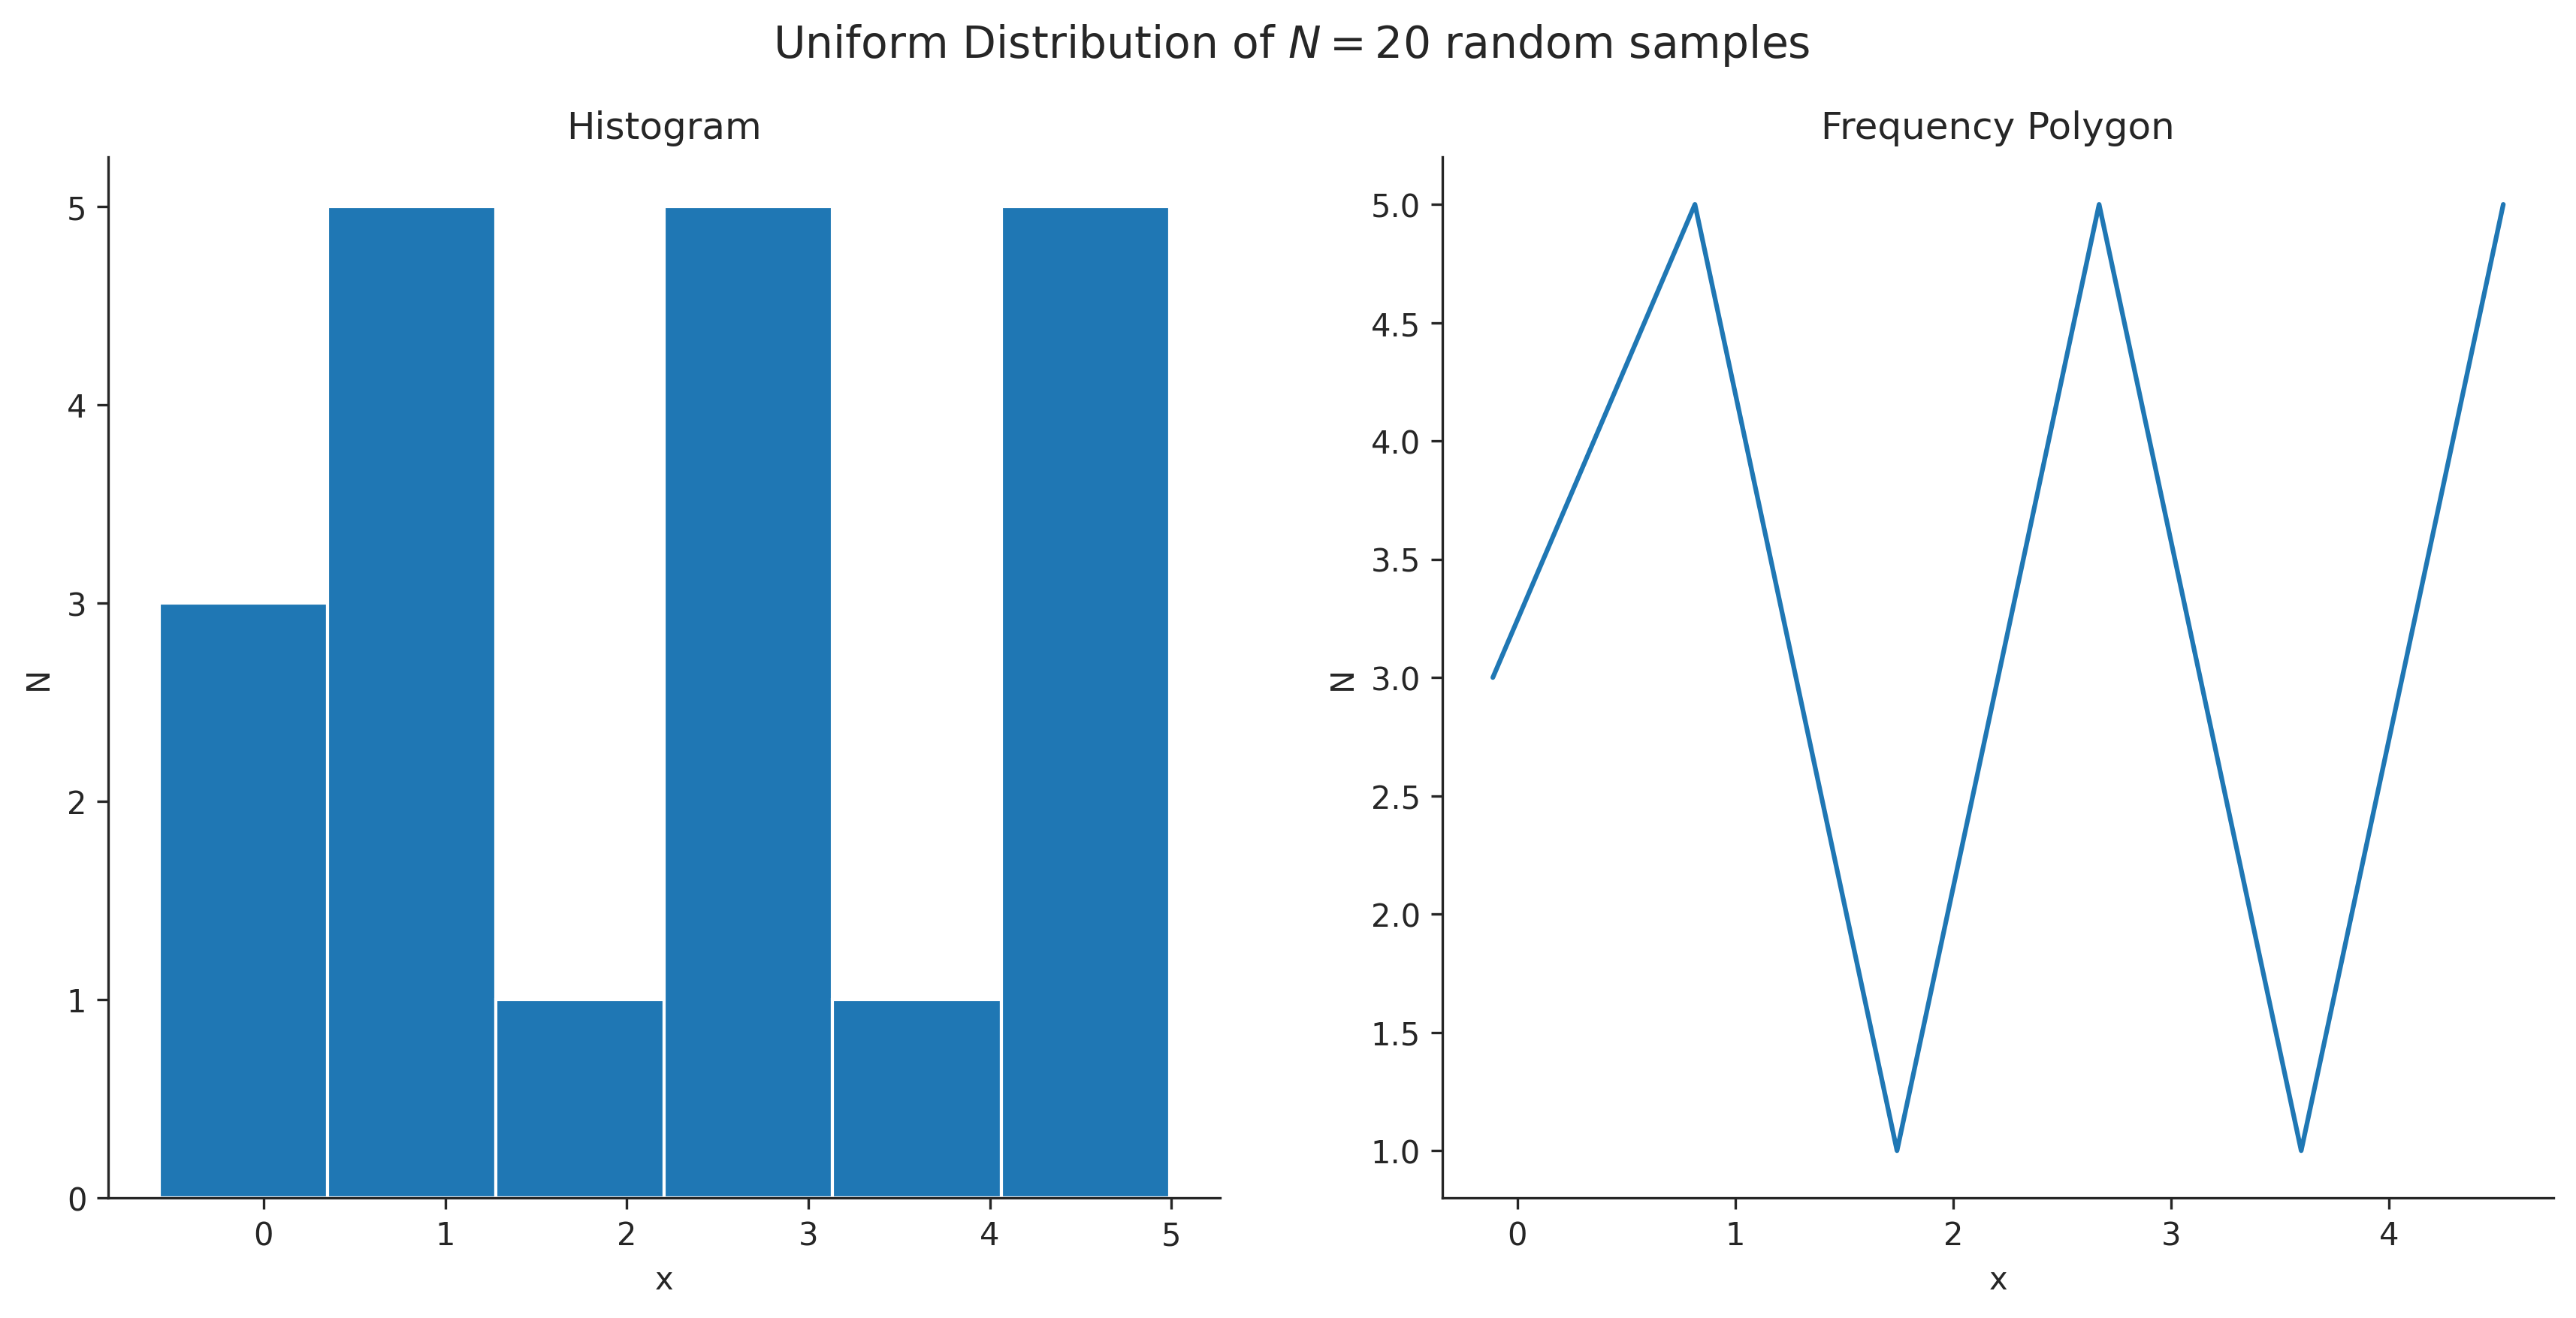

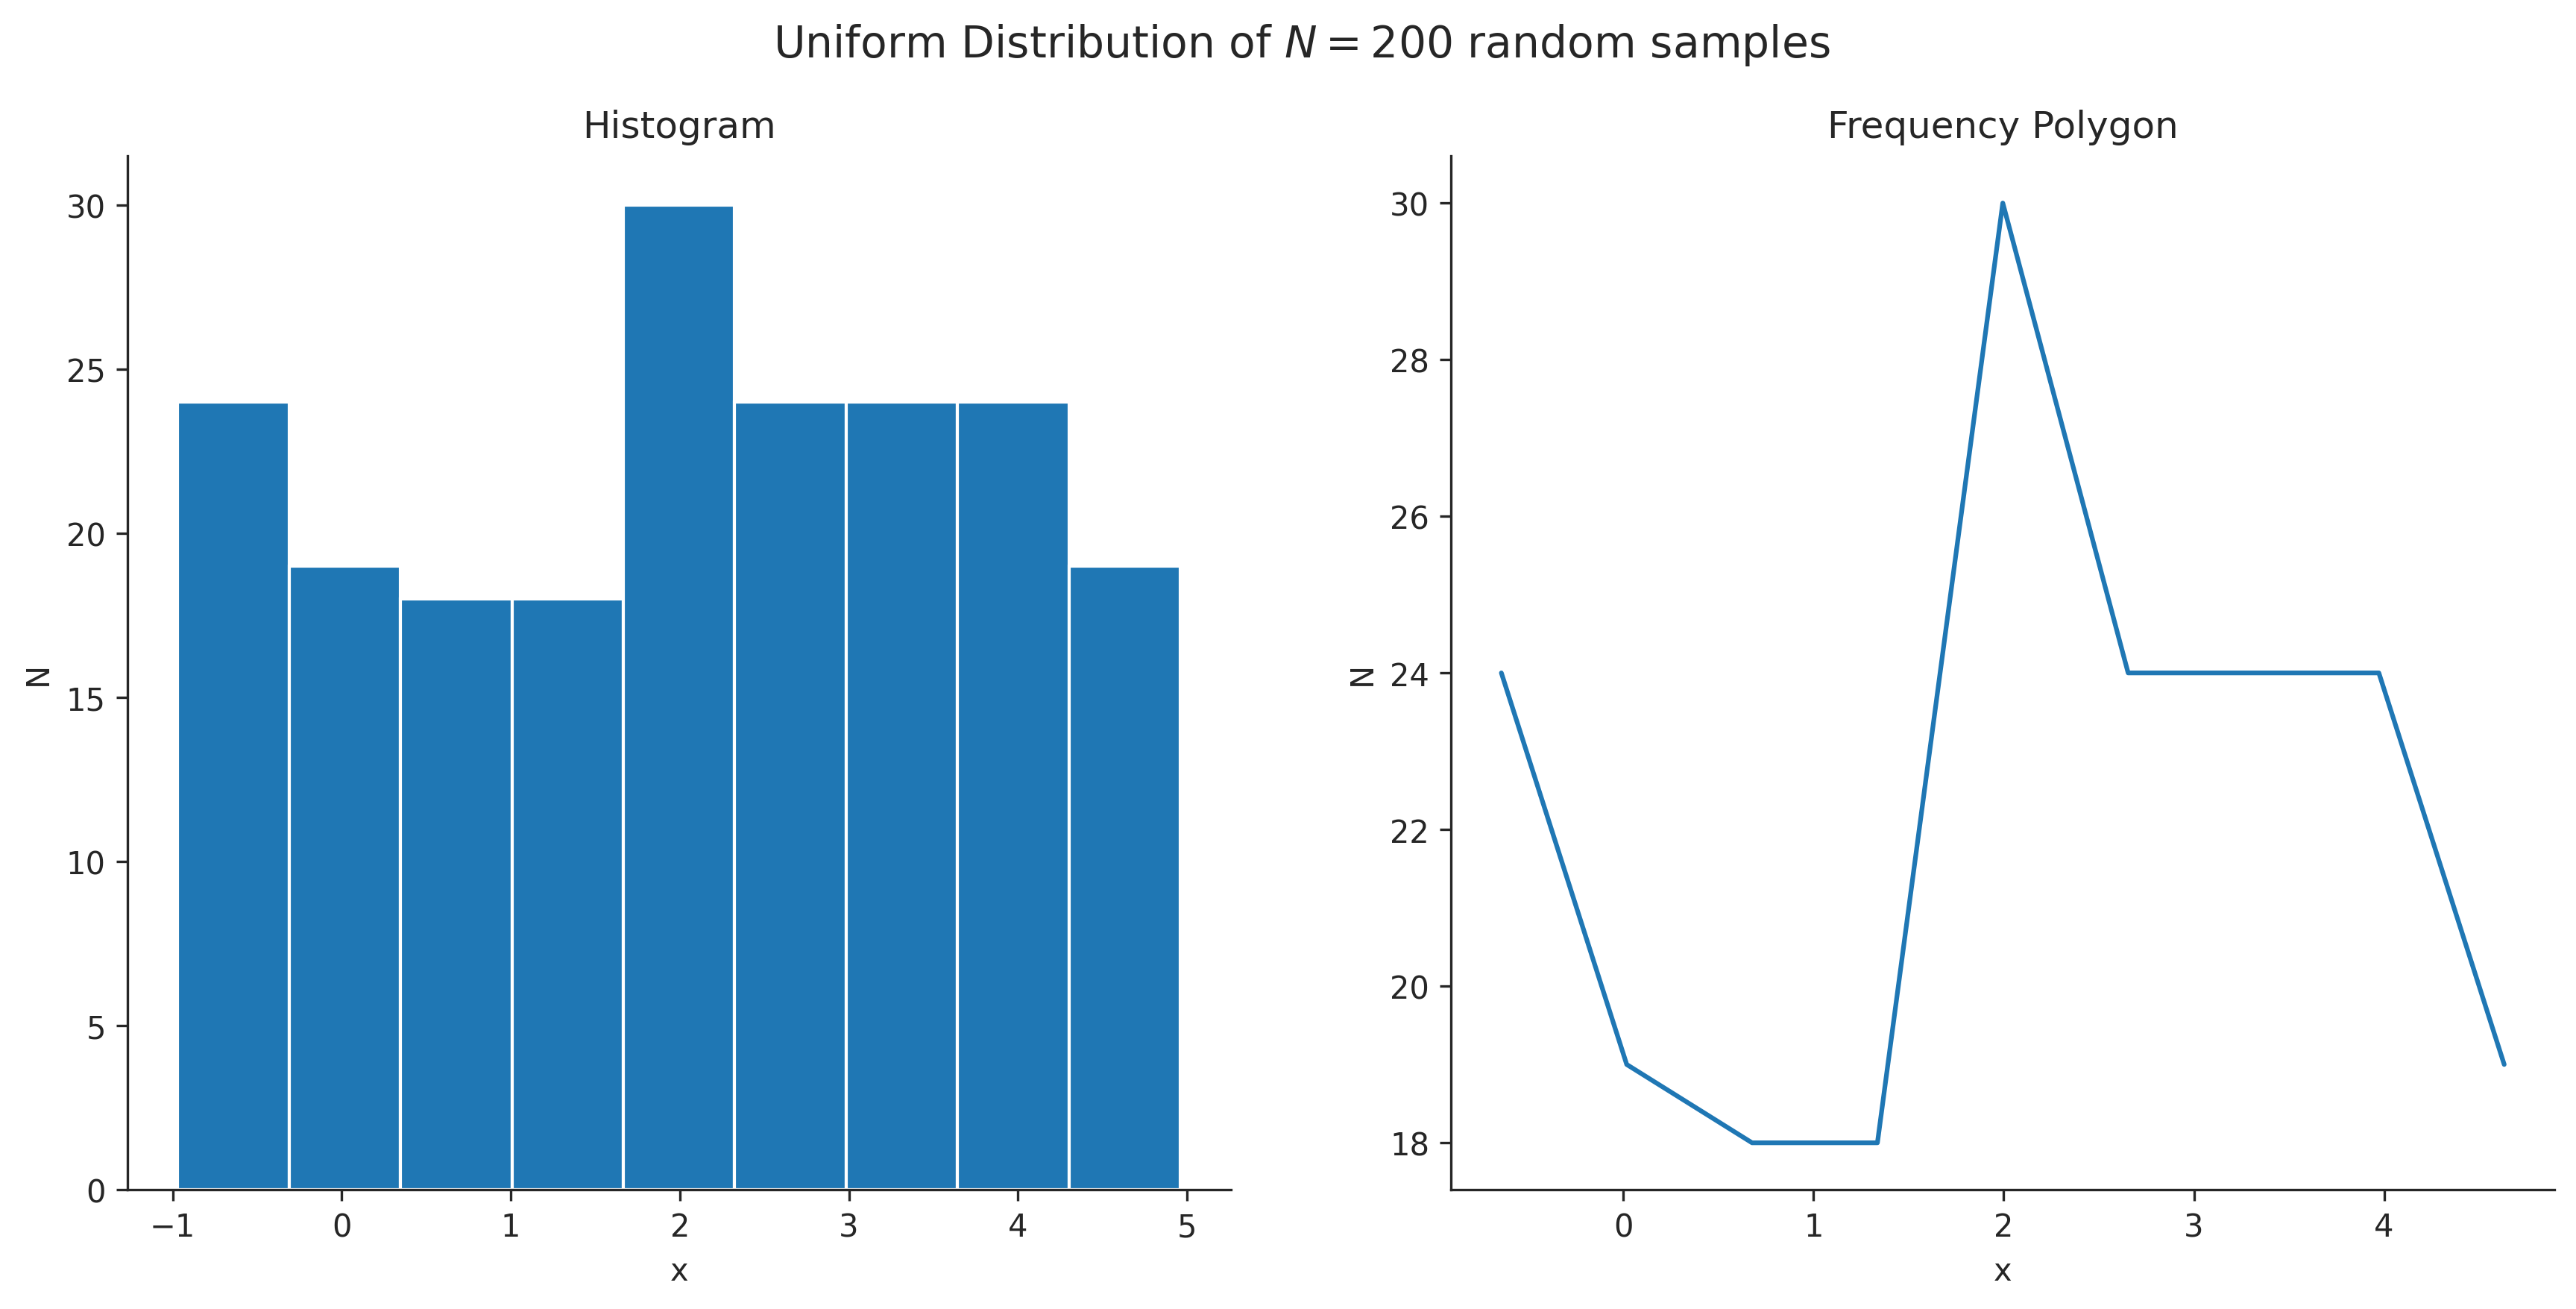

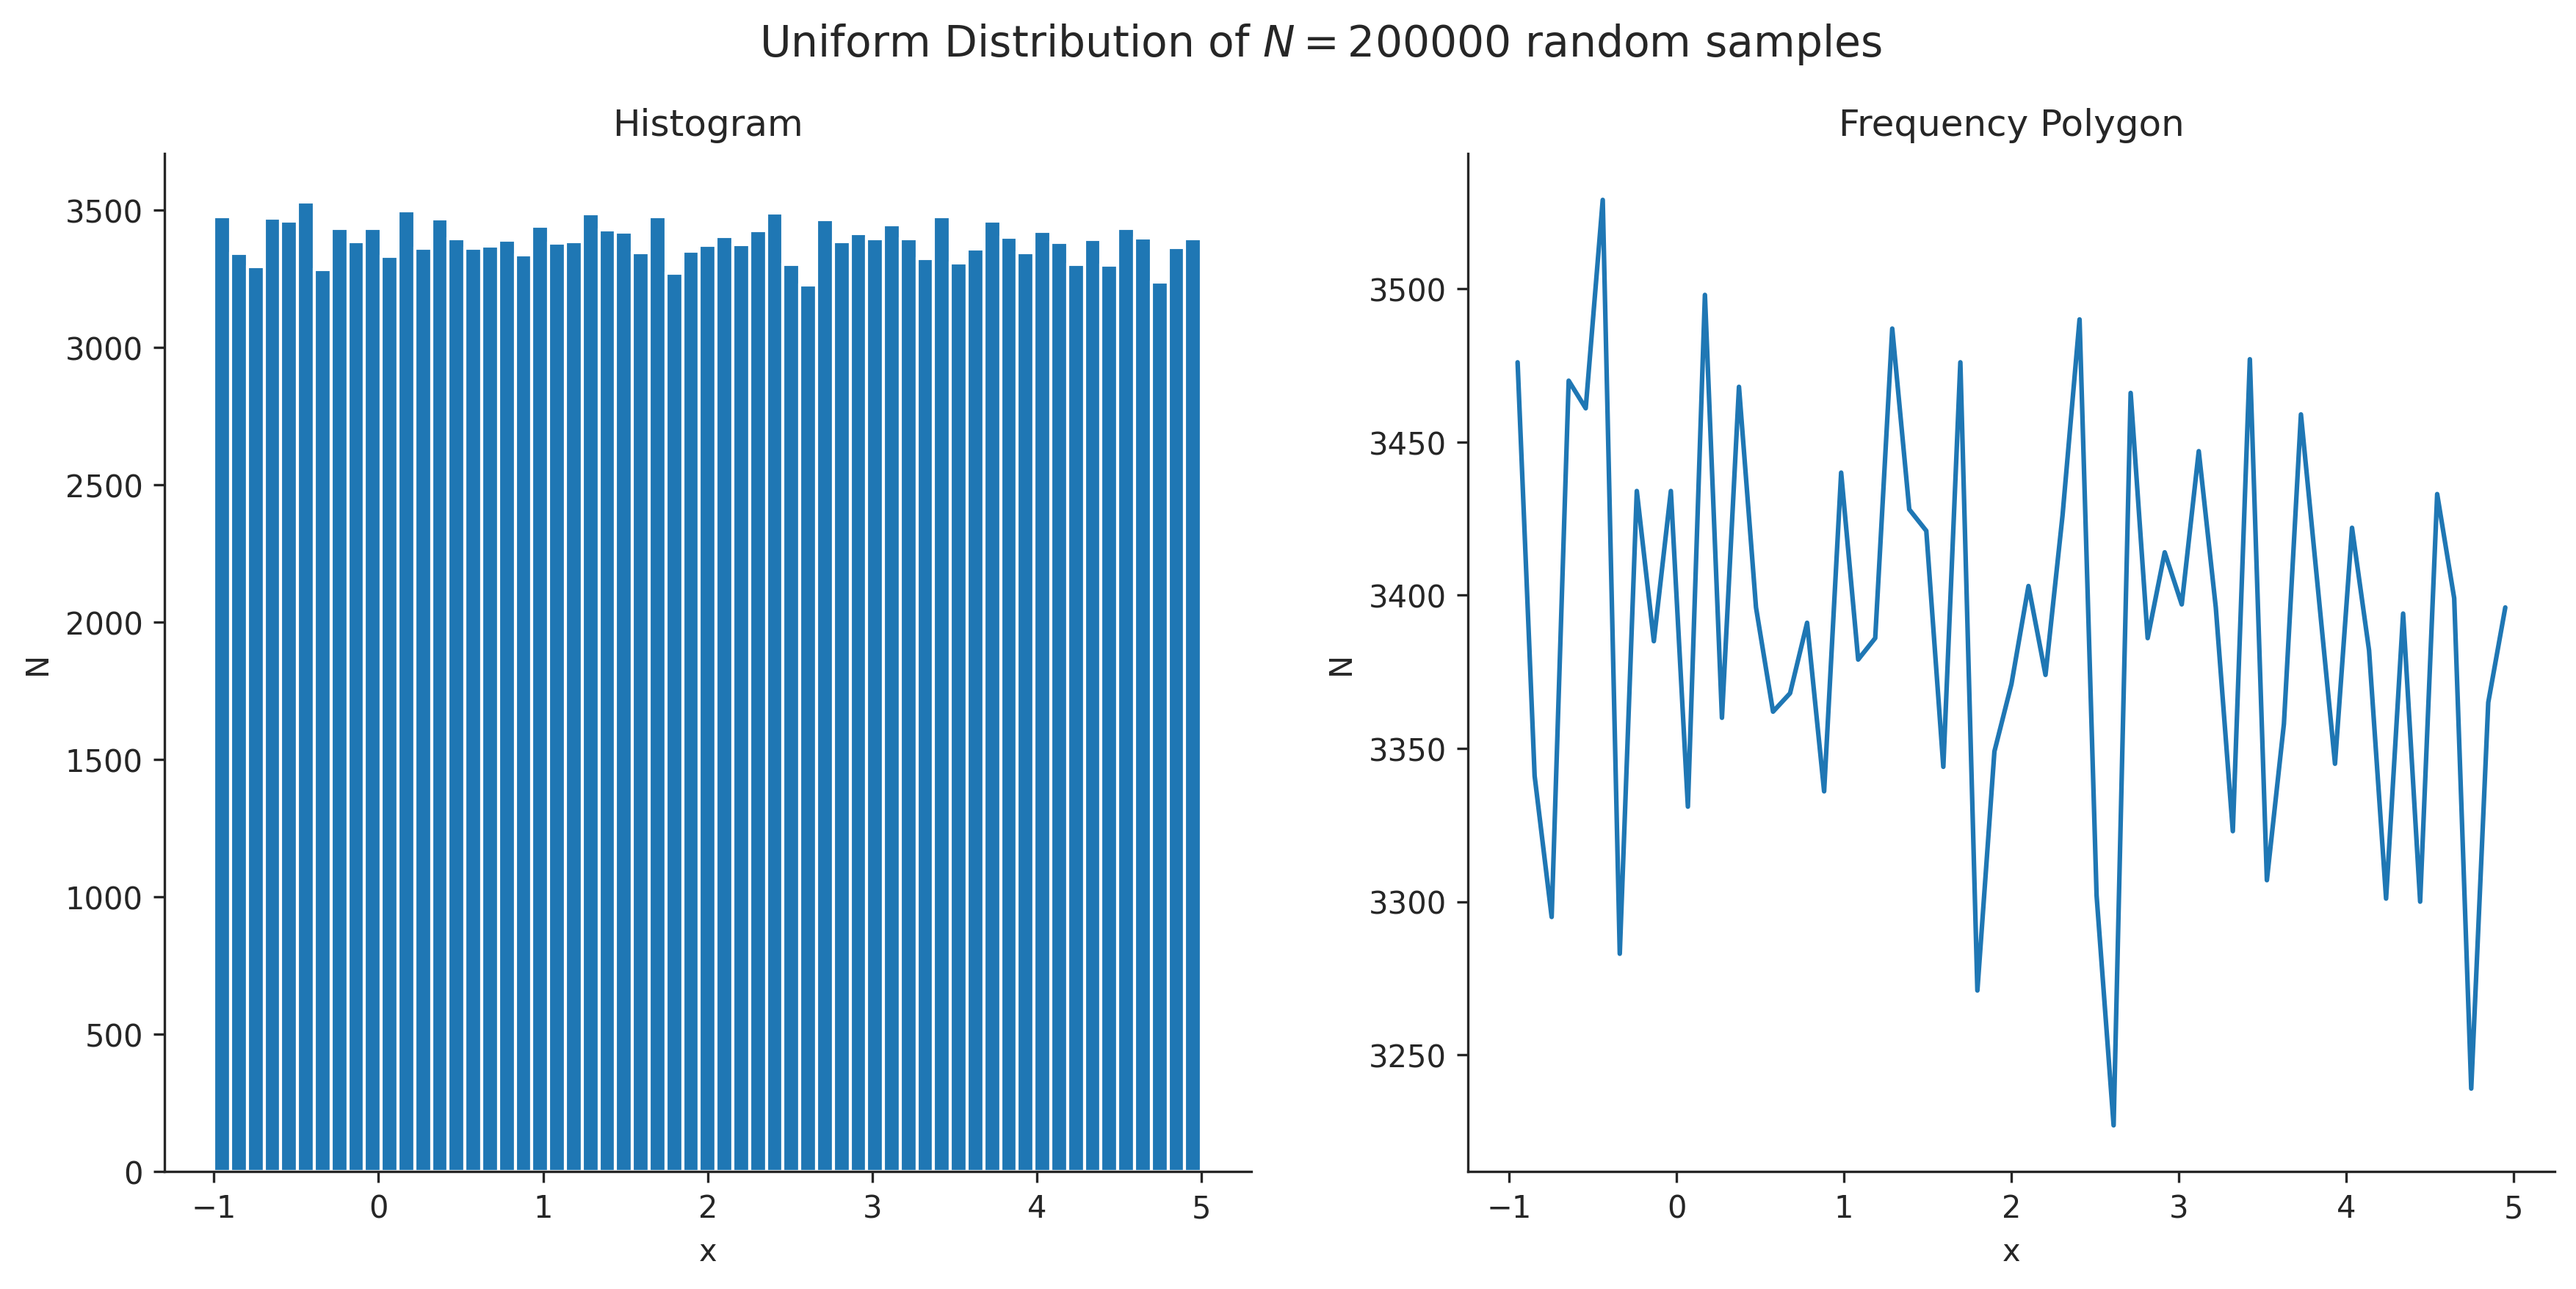

In [5]:
n_group = 1
a = -n_group
b = 5 * n_group
for n in (20, 200, 200000):
    x = np.random.uniform(a, b, n)
    make_plots(x, f'Uniform Distribution of $N={n}$ random samples')

## 2.3 Експоненціальний розподіл
$$\lambda=\frac{N_{\text{бр}}}{2}$$

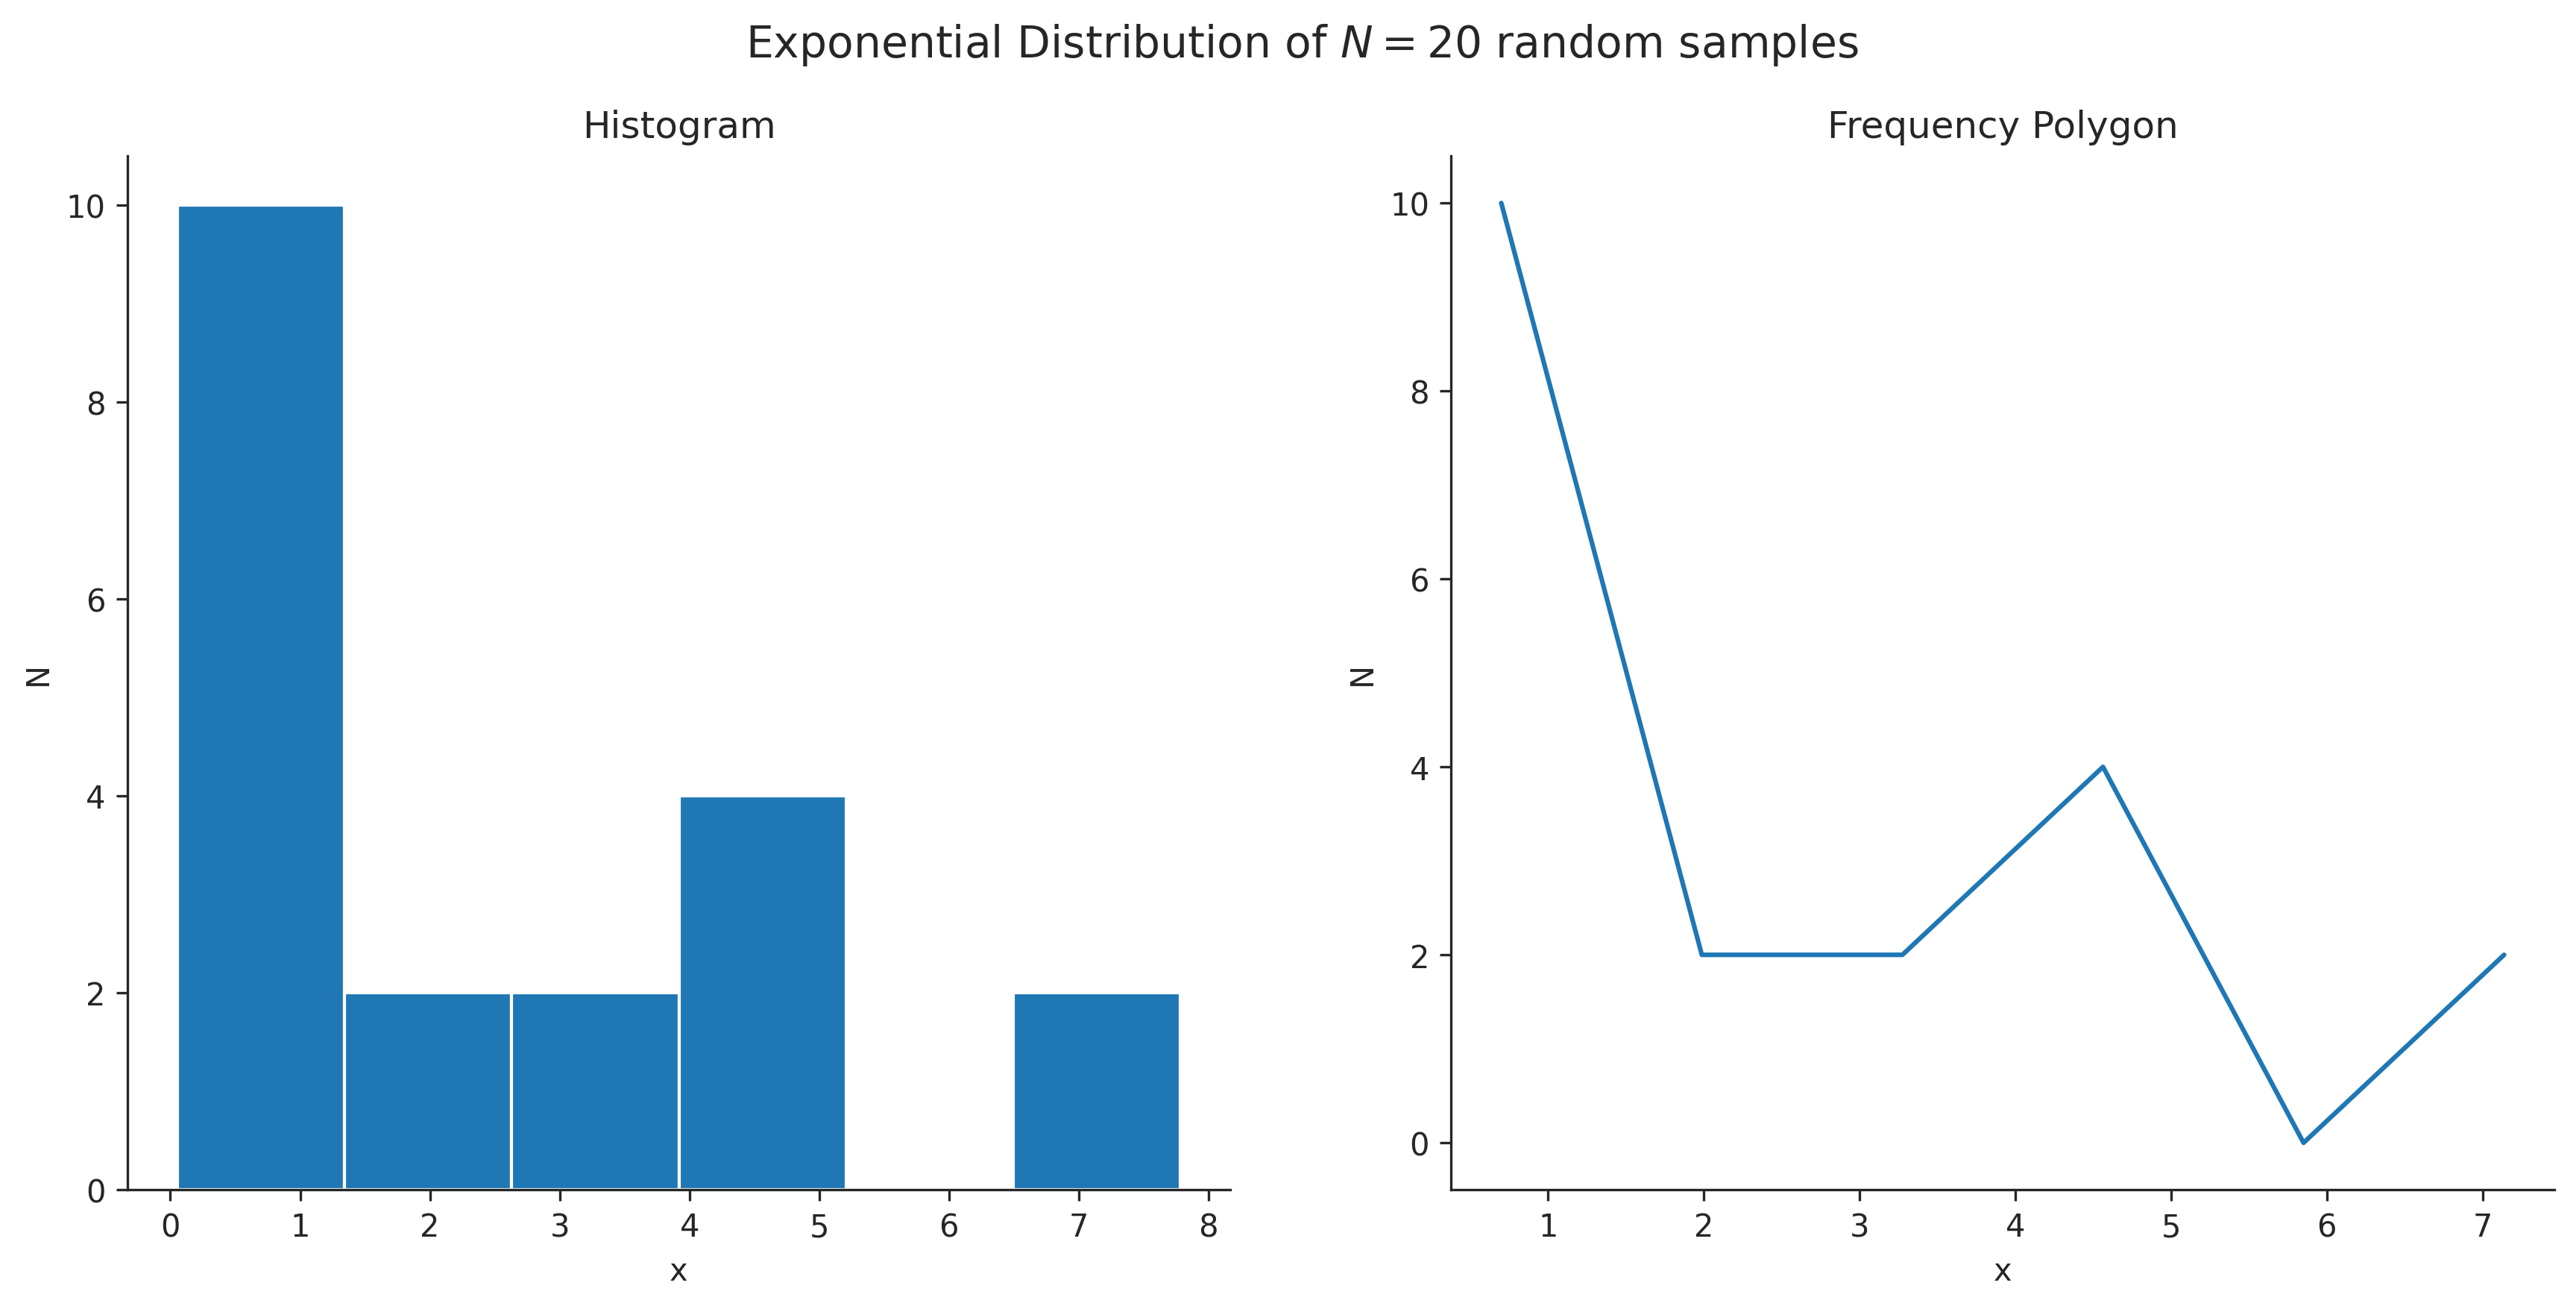

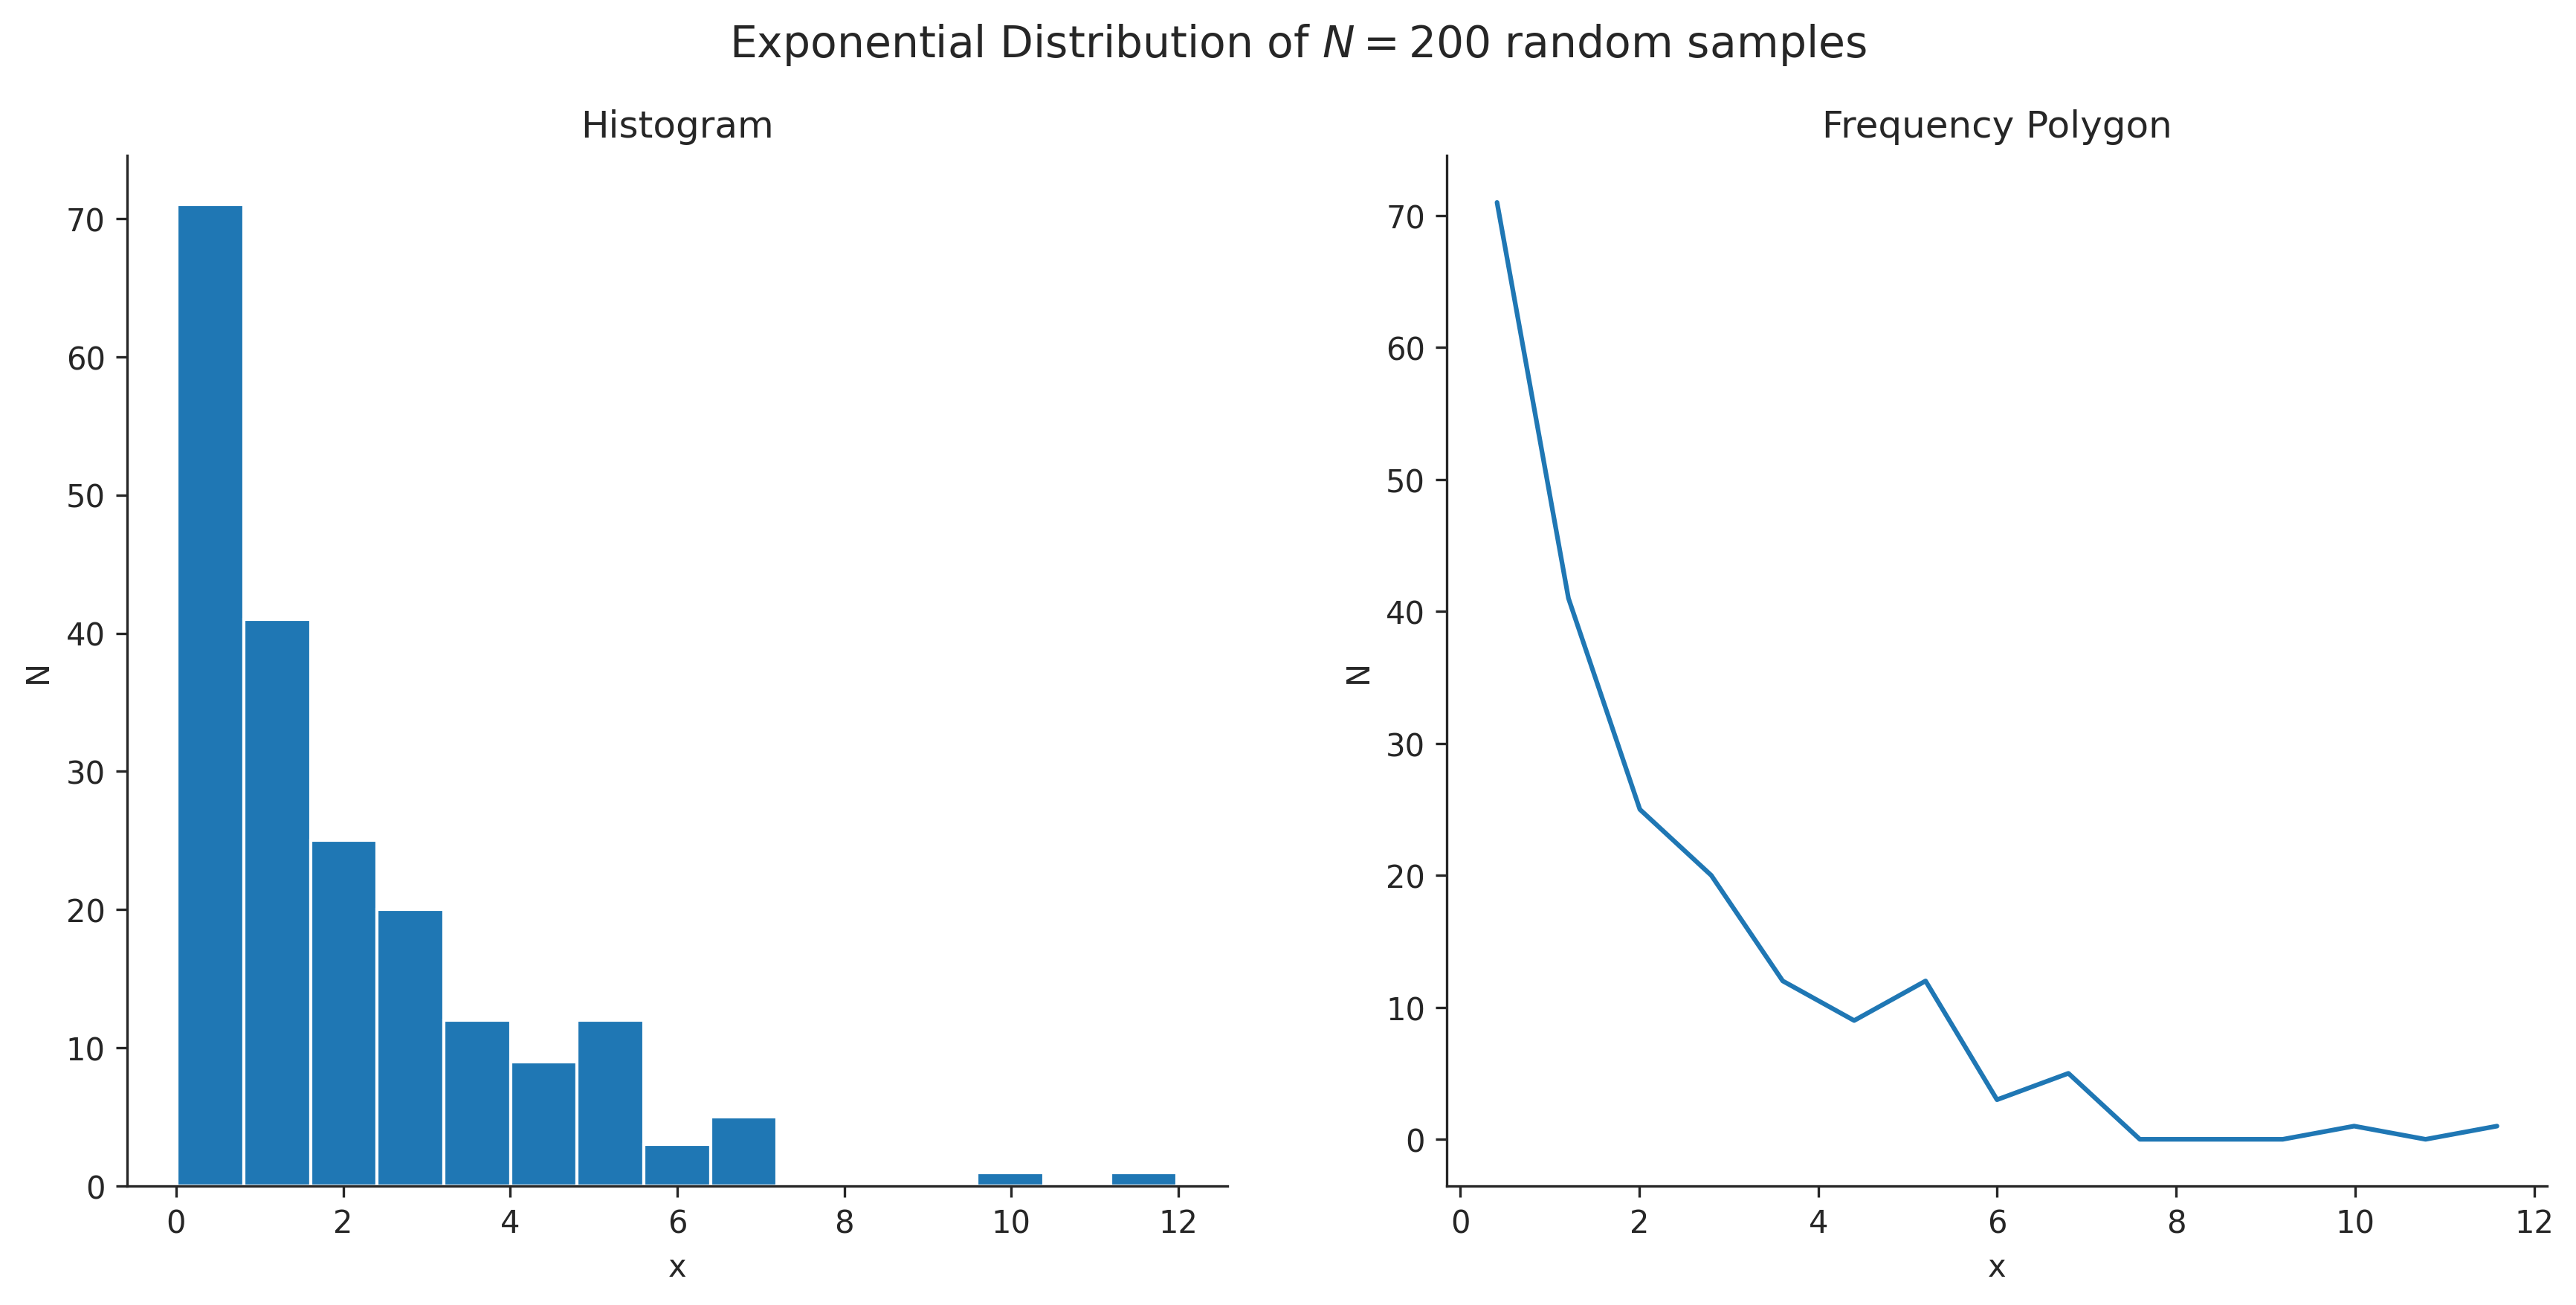

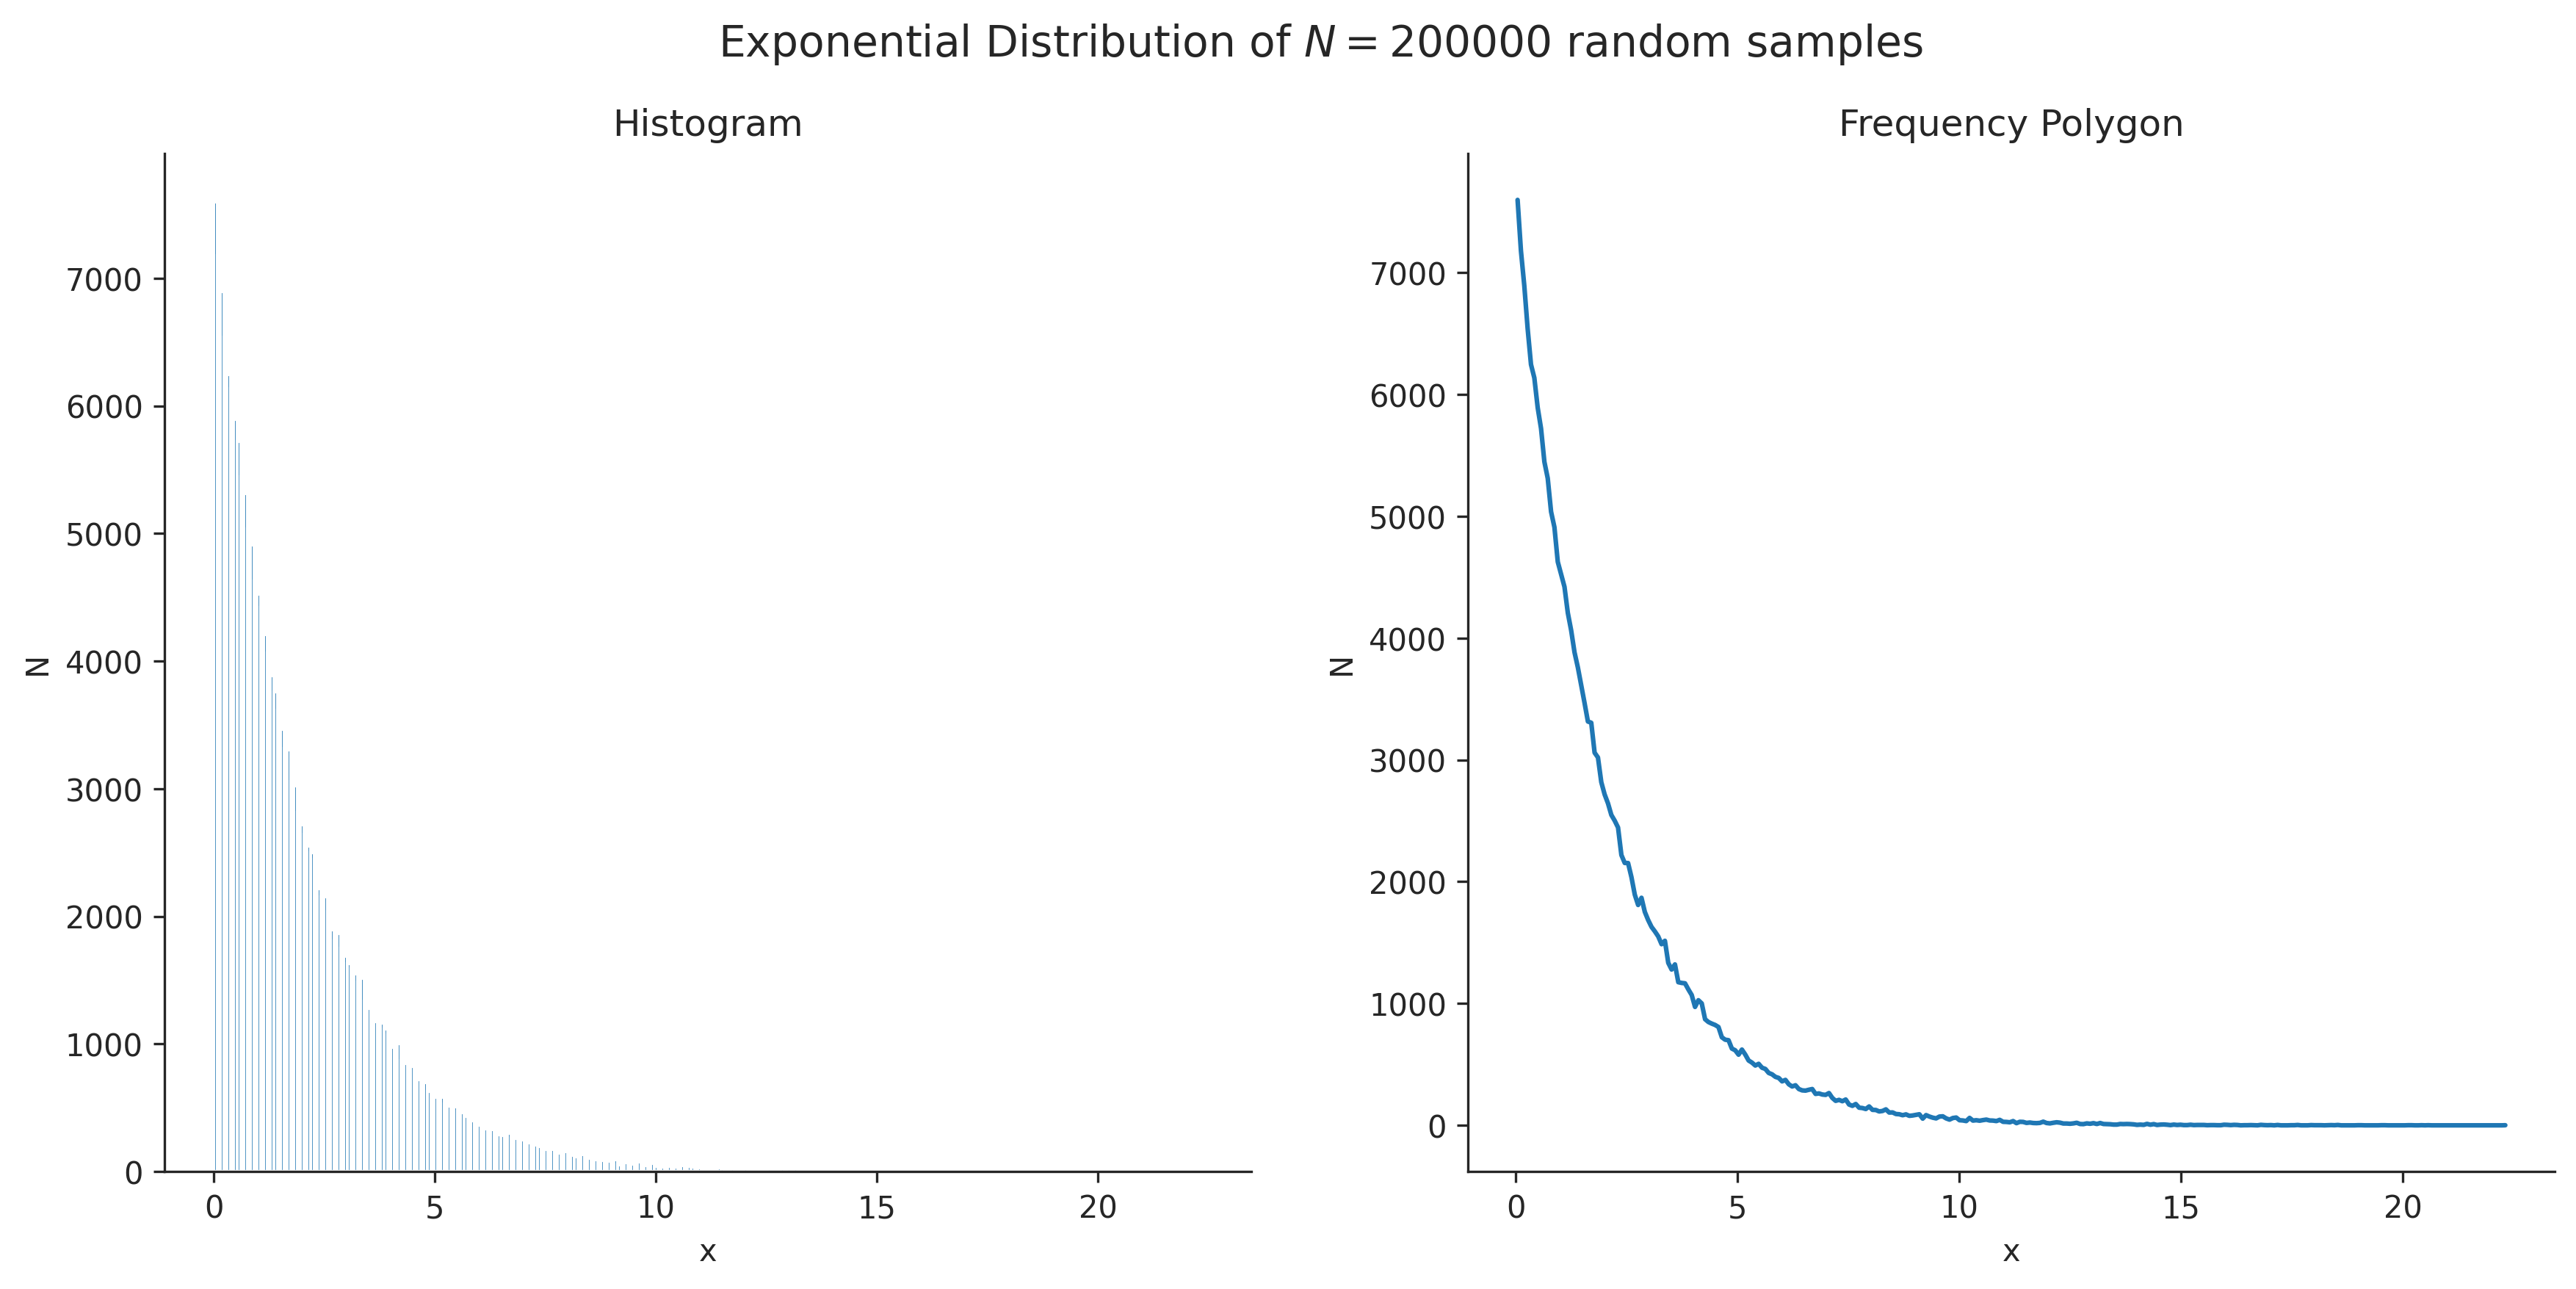

In [6]:
n_group = 1
lam = n_group / 2
for n in (20, 200, 200000):
    x = np.random.exponential(1 / lam, n)
    make_plots(x, f'Exponential Distribution of $N={n}$ random samples')